In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [21]:
data=pd.read_csv('C:/Users/LENOVO/downloads/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

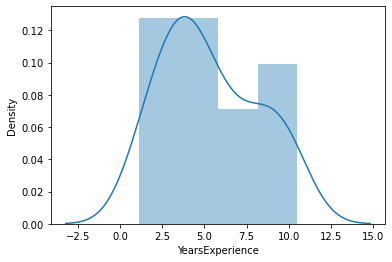

In [23]:
sns.distplot(data['YearsExperience'])

In [8]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

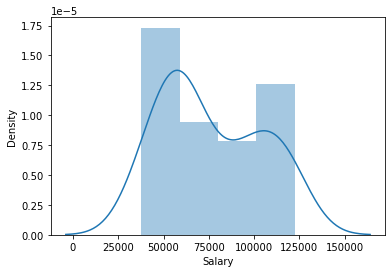

In [24]:
sns.distplot(data['Salary'])

In [9]:
data.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

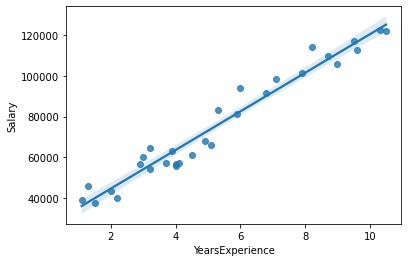

In [25]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [26]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [27]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [28]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [29]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [34]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [35]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [36]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [37]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [38]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64